<a href="https://colab.research.google.com/github/aakashraj-99/ML-projects/blob/master/Car_price_prediction_linear_and_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies..**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**Data Collection and Preprocessing**

In [2]:
car_data = pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_data.shape

(301, 9)

In [5]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Encoding the Categorical Data**

In [6]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace = True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [7]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting the data**

In [8]:
X = car_data.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_data['Selling_Price']

In [9]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


**Splitting the train and test data**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

**MODEL TRAINING : LINEAR REGRESSION**

In [11]:
# loading the linear regression model
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [13]:
training_data_predict = lin_reg.predict(X_train)

In [14]:
#Finding r_squared_error
error_value = metrics.r2_score(Y_train, training_data_predict)
print('R Squared Error Value :',error_value)

R Squared Error Value : 0.8800594535535698


**Visualize Actual Prices of Train vs Predcited Prices**

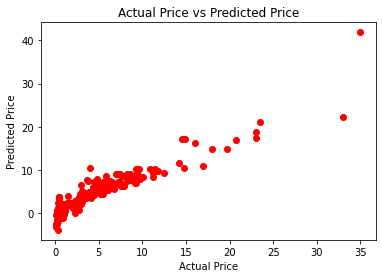

In [15]:
plt.scatter(Y_train, training_data_predict, color ='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

**Test Data Predicition**

In [16]:
test_data_predict = lin_reg.predict(X_test)

In [17]:
error_value = metrics.r2_score(Y_test, test_data_predict)
print("R squared Error : ", error_value)

R squared Error :  0.8484549412088829


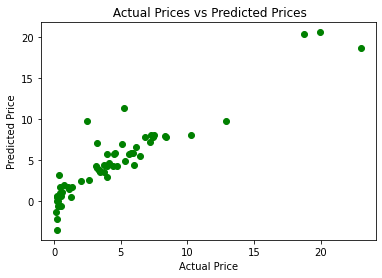

In [18]:
plt.scatter(Y_test, test_data_predict, color ='Green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**LASSO REGRESSION**

In [19]:
lasso_reg = Lasso()

In [20]:
lasso_reg.fit(X_train,Y_train)

Lasso()

**Model Evaluation**

In [21]:
training_data_predict = lasso_reg.predict(X_train)

In [22]:
#Finding r_squared_error
error_value = metrics.r2_score(Y_train, training_data_predict)
print('R Squared Error Value :',error_value)

R Squared Error Value : 0.8416309679582044


**Visualize Actual Prices of Train vs Predcited Prices**

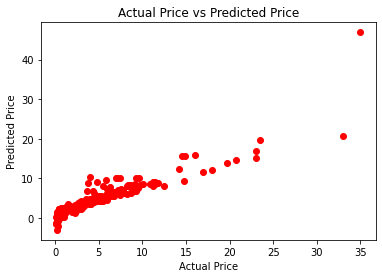

In [23]:
plt.scatter(Y_train, training_data_predict, color ='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

**Test Data Predicition**

In [24]:
test_data_predict = lasso_reg.predict(X_test)

In [25]:
error_value = metrics.r2_score(Y_test, test_data_predict)
print("R squared Error : ", error_value)

R squared Error :  0.8544755211923214


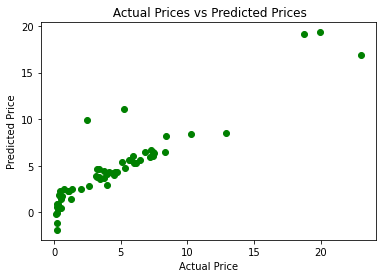

In [26]:
plt.scatter(Y_test, test_data_predict, color ='Green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**New Value Predcition**

In [27]:
new_data = (2018,9.83,2071,1,0,0,0)
new_data = np.asarray(new_data)
new_data_reshaped = new_data.reshape(1,-1)
new_data_predict = lasso_reg.predict(new_data_reshaped)
print(new_data_predict)
print('')
print('')

[7.41556629]




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
